<a href="https://colab.research.google.com/github/pawanshaw66/Missing-Values_FeatureEnginnering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Types of Encoding
# 1> Nominal Encoding
    # a) One hot Encoding
    # b) One hot encoding with many categorical variable
    # c) Mean Encoder
# 2> Ordinal Encoding
    # a)Label Encoding
    # b)Target guided ordinal encoding

### Missing Values- Feature Engineering

In [ ]:
# Why are their missing values?
'''
-> The cause of missing values can be data corruption or failure to record data.
Example : Depression Survey may have some missing values for following reasons
1. They hesitate to put down the information
2. Survey informations are not that valid 
3. people may have died etc..
'''
'''
Data that will be missing
1. continuous data 
2. categorical data
'''
# What are the different types of Missing Data?

# There are two forms of randomly missing values:

# 1> MCAR: Missing completely at random
# 2> MNAR: Missing not at random
# 3> MAR:  Missing at random
'''
MCAR  : A variable is missing competely at random(MACR) if the probability of being is the same for all the observations.
        when data is MACR, there is absolutely no relationship between the data missing and any other values, observed or 
        missing, within the dataset. In other words those missing data points are a random subset of the data. There is 
        nothing systematic going on that makes spme data more likely to be missing than others.
        If values for observations are missing completely at random, then disregarding those cases would not 
        bias the iferences made.
'''



'\nMCAR  : A variable is missing competely at random(MACR) if the probability of being is the same for all the observations.\n        when data is MACR, there is absolutely no relationship between the data missing and any other values, observed or \n        missing, within the dataset. In other words those missing data points are a random subset of the data. There is \n        nothing systematic going on that makes spme data more likely to be missing than others.\n        If values for observations are missing completely at random, then disregarding those cases would not \n        bias the iferences made.\n'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# From above we can  say Embark is an example of missing completely at random 

In [ ]:
'''
MNAR : Missing Data not at random
There is absolutely some relationship between the data missing and any other values, observed or 
        missing, within the dataset.
        Example: In titanic dataset age and cabin has some relationship
'''

'\nMNAR : Missing Data not at random\nThere is absolutely some relationship between the data missing and any other values, observed or \n        missing, within the dataset.\n        Example: In titanic dataset age and cabin has some relationship\n'

In [ ]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)   # put 0 at nan value in cabin otherwise put 1
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int64

In [ ]:
# Find  the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [ ]:
# All the techniques of handling missing values
# 1. Mean/ Median/ Mode replacement
# 2. Random Sample Imputation
# 3. Capturing NAN values with a new features
# 4. End of Distribution Imputation 
# 5. Arbitary Immputation
# 6. Frequent Category Imputation


In [ ]:
# Mean/Median/Mode imputation
'''
When should we apply?
Mean/Median imputation has the assumption that the data are missing completely at random(MACR).
We solve this replacing the NAN with the most frequent occurence of the variables.
'''

'\nWhen should we apply?\nMean/Median imputation has the assumption that the data are missing completely at random(MACR).\nWe solve this replacing the NAN with the most frequent occurence of the variables.\n'

In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# percentage value of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
  df[variable+"_median"] = df[variable].fillna(median)

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

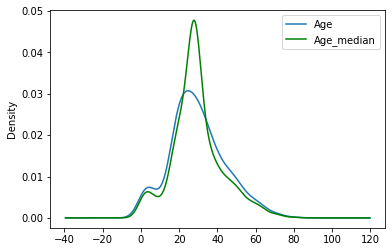

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)         # kde - kernal distribution estimation
df.Age_median.plot(kind='kde',ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
